In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language-detection/Language Detection.csv


# Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset = pd.read_csv('/kaggle/input/language-detection/Language Detection.csv')
dataset.sample(5)

,Text,Language
6832,"hvad har du været op med at rejse dem før, hvi...",Danish
7243,[37] In una pagina a proposito del fare ricerc...,Italian
7969,"ve bir dar açı, bu keskin açı 90 dereceden az ...",Turkish
766,It involves computers learning from data provi...,English
7219,Wikipedia mantiene un approccio ottimistico su...,Italian


In [4]:
df = dataset.copy()
df.sample(5)

,Text,Language
1481,ലേഖനത്തിനു ആവശ്യമായ ചിത്രങ്ങളും ചേർക്കുമ്പോൾ വ...,Malayalam
426,Since Wikipedia is based on the Web and theref...,English
9187,مرحباً ، لماذا لا تتسكع معنا ، يمكنك أن تقول ل...,Arabic
9646,Kannst du das wiederholen?.,German
8873,Jag skulle hellre att du inte gjorde det.,Sweedish


In [5]:
df.shape

(10337, 2)

In [6]:
df['Language'].value_counts(sort=False)

English       1385
Malayalam      594
Hindi           63
Tamil          469
Portugeese     739
French        1014
Dutch          546
Spanish        819
Greek          365
Russian        692
Danish         428
Italian        698
Turkish        474
Sweedish       676
Arabic         536
German         470
Kannada        369
Name: Language, dtype: int64

# Plotting

<BarContainer object of 17 artists>

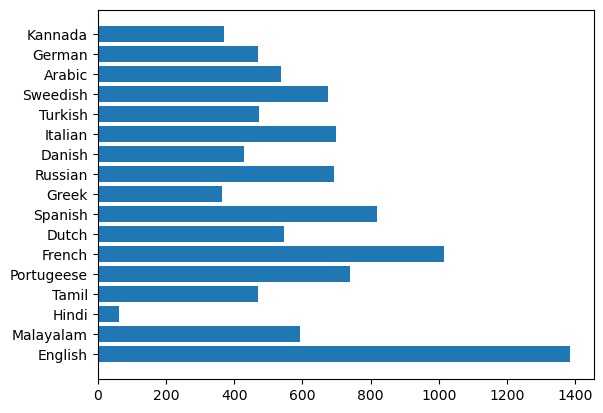

In [7]:
plt.barh(df['Language'].unique(), df['Language'].value_counts(sort=False).values)

In [8]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

# Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'].values, df['Language'].values, 
                                                    test_size=0.2,
                                                    random_state=42)

In [11]:
print(X_train[:2], X_test[:2], y_train[:2], y_test[:2])

['τώρα αργότερα η Μέλι και ο Τέρι έσπασαν αντίο στον παλιό τους φίλο και πήγαν να χαμογελούν ο ένας στον άλλο κρυφά εκείνο το βράδυ, τόσο μητέρα όσο και κόρη.'
 'Améliorez-le ou discutez-en.'] ['И с этими словами она села в его карету, и, даже не попрощавшись с матерью, уехала с ангелом, пока они ехали, карета внезапно вошла в волшебный портал, где она путешествовала по бурной местности, карета сильно ударилась и нарцисса.'
 'Sistemi di tipo probabilistico erano invasi di problemi sia teoretici sia pratici in termini di acquisizione e rappresentazione dei dati[10].'] ['Greek' 'French'] ['Russian' 'Italian']


In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8269,), (8269,), (2068,), (2068,))

# Using Bag of words on text

In [13]:
bog = CountVectorizer()
bog

CountVectorizer()

In [14]:
bog.fit(X_train)

CountVectorizer()

In [15]:
X_train_encoded = bog.transform(X_train)
X_test_encoded = bog.transform(X_test)

In [16]:
X_train_encoded, X_test_encoded

(<8269x34808 sparse matrix of type '<class 'numpy.int64'>'
 	with 130417 stored elements in Compressed Sparse Row format>,
 <2068x34808 sparse matrix of type '<class 'numpy.int64'>'
 	with 27389 stored elements in Compressed Sparse Row format>)

# Using label encoding on language

In [17]:
le = LabelEncoder()
le

LabelEncoder()

In [18]:
le.fit(y_train)

LabelEncoder()

In [19]:
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [20]:
y_train_encoded, y_test_encoded

(array([ 6,  4,  8, ..., 13,  3,  8]), array([12,  8,  3, ...,  2,  6,  4]))

In [21]:
set(y_train_encoded)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

# Model

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
model = MultinomialNB()
model

MultinomialNB()

In [24]:
model.fit(X_train_encoded, y_train_encoded)

MultinomialNB()

In [25]:
y_preds = model.predict(X_test_encoded)
y_preds

array([12,  8,  3, ...,  2,  6,  4])

In [26]:
y_preds.shape, y_test_encoded.shape

((2068,), (2068,))

In [27]:
def accuracy(y_test, y_preds):
    return{"Accuracy": [sum(y_preds==y_test)/len(y_preds)*100]}

In [28]:
acc = accuracy(y_test_encoded, y_preds)
acc

{'Accuracy': [98.25918762088975]}

In [29]:
labels = le.classes_
labels

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test_encoded, y_preds, target_names=labels))

              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       106
      Danish       0.97      0.96      0.97        73
       Dutch       0.99      0.97      0.98       111
     English       0.92      1.00      0.96       291
      French       0.99      0.99      0.99       219
      German       1.00      0.97      0.98        93
       Greek       1.00      0.97      0.99        68
       Hindi       1.00      1.00      1.00        10
     Italian       1.00      0.99      1.00       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.98      0.99       121
  Portugeese       0.99      0.98      0.99       144
     Russian       1.00      0.99      0.99       136
     Spanish       0.99      0.97      0.98       160
    Sweedish       1.00      0.98      0.99       133
       Tamil       1.00      0.99      0.99        87
     Turkish       1.00      0.94      0.97       105

    accuracy              

In [32]:
test_index = 200
sample_text = X_test[test_index]
sample_label = y_test[test_index]
sample_text_encoded = bog.transform([sample_text])
y_sample_prediction = model.predict(sample_text_encoded)
labels[y_sample_prediction[0]], sample_text, sample_label

('Italian',
 "come quando ci siamo fermati dov'eravamo e devi ripeterlo perché qual è il suono con cui qualcuno sbaglia.",
 'Italian')

In [33]:
sample_hindi_text = 'चलो बाहर जाकर खाना खाते हैं'
sample_french_text = "C'est un chien"
sample_hindi_encoded = bog.transform([sample_hindi_text])
sample_french_encoded = bog.transform([sample_french_text])

y_hindi_prediction = model.predict(sample_text_encoded)
y_french_prediction = model.predict(sample_french_encoded)
print(f"prediction: {labels[y_hindi_prediction][0]}---text: {sample_hindi_text}")
print(f"prediction: {labels[y_french_prediction][0]}---text: {sample_french_text}")

prediction: Italian---text: चलो बाहर जाकर खाना खाते हैं
prediction: French---text: C'est un chien


In [34]:
final_accuracy = pd.DataFrame.from_dict(acc)
final_accuracy

,Accuracy
0,98.259188


In [35]:
final_accuracy.to_csv("/kaggle/working/accuracy.csv",index=False)